# Exploring Academic Artistry Unveiling Insights into Student-Written Summaries with Data Science

In [703]:
### TODO: Install required packages
### Student's code here
##!pip install pandas
##!pip install scikit-learn
##!pip install numpy
##!pip install matplotlib
##!pip install seaborn
##!pip install textstat
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
### END

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [704]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textstat as txtst
import nltk
from nltk.corpus import stopwords

###

In [705]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [706]:
#merged two data sets 
train_sum = pd.read_csv("summaries_train.csv", dtype=dtypes)
train_prom = pd.read_csv("prompts_train.csv", dtype=dtypes)
df_train = pd.merge(train_sum, train_prom, on='prompt_id', how='inner')
df_train = df_train[use_cols]
df_train.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...


## **Section 2: Features (Q2 and Q3, 25 points total)**

In [707]:
#copied the dataframe to a new Dataframe to trackback after errors
count_df=df_train.copy()
count_df.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...


In [708]:
#Cleaned the missing values in content and wording by replacing missing values by mean values 
def clean_missing_values(df, columns):
    for col in columns:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
columns_to_clean = ['content', 'wording']
clean_missing_values(count_df, columns_to_clean)


In [709]:
#converted the values to float to perform numerical functions later on
def convert_data_types(df, columns, new_type):
    for col in columns:
        df[col] = df[col].astype(new_type)
columns_to_convert = ['content', 'wording']
new_data_type = float
convert_data_types(count_df, columns_to_convert, new_data_type)


In [710]:
#constructed tables for mentioned features
count_df['num_of_words_text']=[len(paragraph.split()) for paragraph in count_df['text']]
count_df['num_of_words_prompt']=[len(paragraph.split()) for paragraph in count_df['prompt_text']]
count_df['distinct_words_text'] = count_df['text'].str.split().apply(set).apply(list).apply(len)
count_df['distinct_words_prompt'] =count_df['prompt_text'].str.split().apply(set).apply(list).apply(len)
count_df['num_of_common_words_1'] = [len(set(a.split()) & set(b.split())) for a, b in zip(count_df['text'], count_df['prompt_text'])]
count_df['num_of_common_words_2'] = [len(set(a.split()) & set(b.split())) for a, b in zip(count_df['text'], count_df['prompt_question'])]
count_df['num_of_common_words_3'] = [len(set(a.split()) & set(b.split())) for a, b in zip(count_df['text'], count_df['prompt_title'])]
count_df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,distinct_words_text,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,61,596,51,300,21,5,1
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,203,596,138,300,46,9,3
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,60,596,50,300,29,5,1
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,76,596,59,300,36,7,1
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,27,596,25,300,15,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,33,604,30,303,20,0,0
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,30,604,27,303,18,3,0
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,29,604,22,303,17,0,0
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,49,604,35,303,21,2,0


In [711]:
#created 5 more features using textstat library. 
count_df['flesch_reading_ease'] = count_df['text'].apply(txtst.flesch_reading_ease)
count_df['reading_time']=count_df['text'].apply(txtst.reading_time)
count_df['syllable_count']=count_df['text'].apply(txtst.syllable_count)
count_df['letter_count']=count_df['text'].apply(txtst.letter_count,ignore_spaces=True)
count_df['sentence_count']=count_df['text'].apply(txtst.sentence_count)
count_df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,distinct_words_text,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,61,596,51,300,21,5,1,64.41,4.20,93,283,4
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,203,596,138,300,46,9,3,65.22,14.98,301,990,14
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,60,596,50,300,29,5,1,76.22,4.20,86,277,5
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,76,596,59,300,36,7,1,54.26,5.52,111,366,3
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,27,596,25,300,15,5,1,74.69,1.75,38,117,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,33,604,30,303,20,0,0,54.90,2.17,46,147,1
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,30,604,27,303,18,3,0,66.41,1.97,39,131,1
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,29,604,22,303,17,0,0,95.47,1.79,34,119,3
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,49,604,35,303,21,2,0,71.85,3.64,71,242,3


## **Section 3: Content and Wording (Q4, 10 points)**

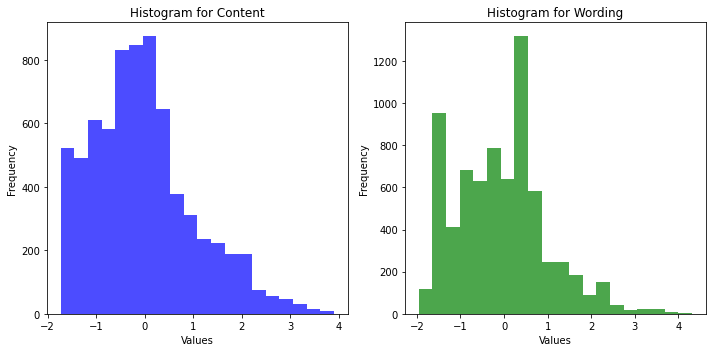

In [712]:
#plotted histogram for content and wording
data1=count_df['content']
data2=count_df['wording']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data1, bins=20, color='blue', alpha=0.7)
plt.title('Histogram for Content')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data2, bins=20, color='green', alpha=0.7)
plt.title('Histogram for Wording')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

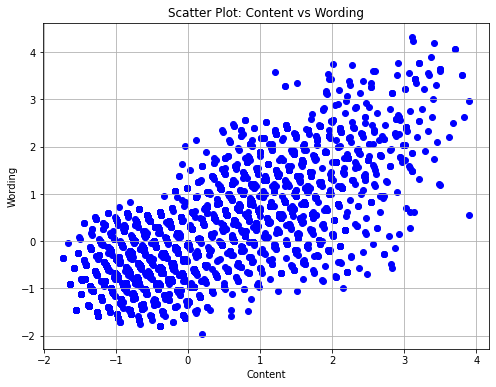

In [713]:
#scatter plot between content and wording
a=count_df['content']
b=count_df['wording']
plt.figure(figsize=(8, 6)) 
plt.scatter(a, b, c='blue', marker='o', label='Content vs Wording')
plt.xlabel('Content')
plt.ylabel('Wording')
plt.title('Scatter Plot: Content vs Wording')
plt.grid(True)  
plt.show()


In [714]:
#Calculated the range for content and wording by using min and max function
range_of_Content_a =count_df['content'].min()
range_of_Content_b =count_df['content'].max()
range_of_wording_a =count_df['wording'].min()
range_of_wording_b = count_df['wording'].max()
print("Range of Content: (", range_of_Content_a,",",range_of_Content_b,")")
print("Range of Wording: (", range_of_wording_a,",",range_of_wording_b,")")


Range of Content: ( -1.72985945253881 , 3.90032610436019 )
Range of Wording: ( -1.96261379376134 , 4.3106931513921 )


In [715]:
#Used corr() function to find the correlation between content and wording, they have correlation around 7 and 7.5 which is a good correlation. 
correlation = count_df['content'].corr(count_df['wording'])
count_df['correlation'] = correlation


In [716]:
count_df.describe()

,content,wording,num_of_words_text,num_of_words_prompt,distinct_words_text,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count,correlation
count,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7165.000000,7.165000e+03
mean,-0.014853,-0.063072,74.811724,688.472017,52.145569,340.175017,32.223029,5.461270,0.489184,69.809719,5.047690,100.751570,334.078297,3.922959,7.513805e-01
std,1.043569,1.036048,53.503992,173.787033,29.510068,51.346589,19.610756,3.092933,0.818922,14.491586,3.731501,73.077332,245.548669,3.188597,1.110301e-16
min,-1.729859,-1.962614,22.000000,550.000000,13.000000,300.000000,5.000000,0.000000,0.000000,-62.510000,1.290000,26.000000,86.000000,1.000000,7.513805e-01
25%,-0.799545,-0.872720,39.000000,550.000000,31.000000,303.000000,19.000000,3.000000,0.000000,62.010000,2.600000,53.000000,173.000000,2.000000,7.513805e-01
50%,-0.093814,-0.081769,58.000000,604.000000,44.000000,319.000000,27.000000,5.000000,0.000000,71.140000,3.860000,78.000000,256.000000,3.000000,7.513805e-01
75%,0.499660,0.503833,92.000000,966.000000,63.000000,422.000000,39.000000,7.000000,1.000000,79.300000,6.160000,124.000000,409.000000,5.000000,7.513805e-01
max,3.900326,4.310693,647.000000,966.000000,332.000000,422.000000,225.000000,16.000000,4.000000,108.030000,48.330000,929.000000,3167.000000,47.000000,7.513805e-01


In [717]:
count_df


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,...,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count,correlation
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,61,596,...,300,21,5,1,64.41,4.20,93,283,4,0.75138
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,203,596,...,300,46,9,3,65.22,14.98,301,990,14,0.75138
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,60,596,...,300,29,5,1,76.22,4.20,86,277,5,0.75138
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,76,596,...,300,36,7,1,54.26,5.52,111,366,3,0.75138
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,27,596,...,300,15,5,1,74.69,1.75,38,117,2,0.75138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,33,604,...,303,20,0,0,54.90,2.17,46,147,1,0.75138
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,30,604,...,303,18,3,0,66.41,1.97,39,131,1,0.75138
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,29,604,...,303,17,0,0,95.47,1.79,34,119,3,0.75138
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,49,604,...,303,21,2,0,71.85,3.64,71,242,3,0.75138


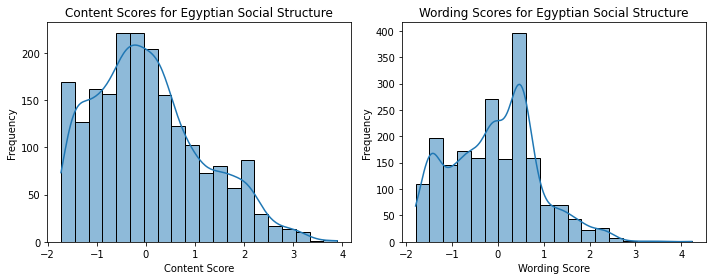

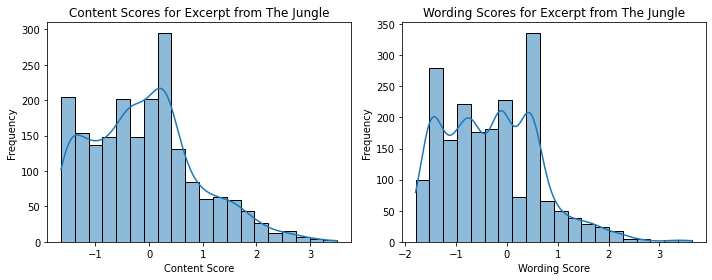

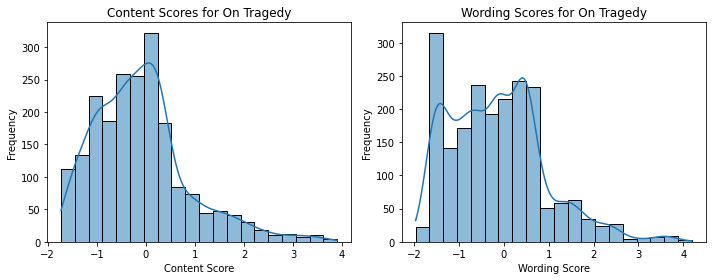

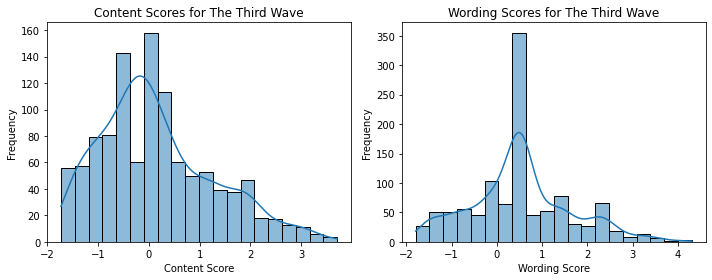

In [718]:
#Here i have constructed histograms for content and woding score for each Prompt title to visualize 
# the shapes of these distributions differ for the different prompts and as we can see distributions differ for different prompts
prompt_groups = count_df.groupby('prompt_title')
for prompt_title, group_data in prompt_groups:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(group_data['content'], bins=20, kde=True)
    plt.title(f'Content Scores for {prompt_title}')
    plt.xlabel('Content Score')
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    sns.histplot(group_data['wording'], bins=20, kde=True)
    plt.title(f'Wording Scores for {prompt_title}')
    plt.xlabel('Wording Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

In [719]:
essays_df=count_df.copy()
essays_df


,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,...,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count,correlation
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,61,596,...,300,21,5,1,64.41,4.20,93,283,4,0.75138
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,203,596,...,300,46,9,3,65.22,14.98,301,990,14,0.75138
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,60,596,...,300,29,5,1,76.22,4.20,86,277,5,0.75138
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,76,596,...,300,36,7,1,54.26,5.52,111,366,3,0.75138
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,27,596,...,300,15,5,1,74.69,1.75,38,117,2,0.75138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,33,604,...,303,20,0,0,54.90,2.17,46,147,1,0.75138
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,30,604,...,303,18,3,0,66.41,1.97,39,131,1,0.75138
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,29,604,...,303,17,0,0,95.47,1.79,34,119,3,0.75138
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,49,604,...,303,21,2,0,71.85,3.64,71,242,3,0.75138


In [720]:
#used a function to  remove stop words from text column using nltk library to get stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
essays_df['text'] = essays_df['text'].apply(remove_stopwords)


In [721]:
essays_df
#as we can see there are no stop words

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,...,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count,correlation
0,000e8c3c7ddb,814d6b,third wave experimentto see people reacted new...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,61,596,...,300,21,5,1,64.41,4.20,93,283,4,0.75138
1,0070c9e7af47,814d6b,Third Wave developed rapidly students genuinly...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,203,596,...,300,46,9,3,65.22,14.98,301,990,14,0.75138
2,0095993991fe,814d6b,third wave started experiment within class slo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,60,596,...,300,29,5,1,76.22,4.20,86,277,5,0.75138
3,00c20c6ddd23,814d6b,experimen orginally even terrible thngs happen...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,76,596,...,300,36,7,1,54.26,5.52,111,366,3,0.75138
4,00d40ad10dc9,814d6b,third wave developed quickly due students part...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,27,596,...,300,15,5,1,74.69,1.75,38,117,2,0.75138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"made complex storyline, plot makes audience fe...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,33,604,...,303,20,0,0,54.90,2.17,46,147,1,0.75138
7161,ff0f65eecf02,39c16e,Aristotle descirbes ideal tradgedy one complex...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,30,604,...,303,18,3,0,66.41,1.97,39,131,1,0.75138
7162,ff186473ea0a,39c16e,tragedy complex plan simple one.A good plot pl...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,29,604,...,303,17,0,0,95.47,1.79,34,119,3,0.75138
7163,ff5e9e6068da,39c16e,Aristotle believed ideal tradegy include purga...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,49,604,...,303,21,2,0,71.85,3.64,71,242,3,0.75138


In [722]:
#used a counter function to count the most occuring words in good essays that is the essays with positive scores.
filtered_data = essays_df[(essays_df['content'] > 0) & (essays_df['wording'] > 0)]
positive_text = " ".join(filtered_data['text'])
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words
filtered_words = remove_stopwords(positive_text)
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
for word, count in most_common_words:
    print(f"{word}: {count}")

would: 2813
meat: 1744
tragedy: 1094
students: 1050
people: 1039
spoiled: 971
also: 920
good: 859
social: 787
could: 774


In [723]:
#similary identified the least occuirng words and most occuring words in bad essays(with negative scores) and used re library to separate words from 
# special characters like '.' and '"'
filtered_data = essays_df[(essays_df['content'] < 0) & (essays_df['wording'] < 0)]
negative_text = " ".join(filtered_data['text'])
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

import re

def remove_stopwords_and_special_chars(text):
    words = re.findall(r'\b\w+\b', text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

filtered_words = remove_stopwords(negative_text)
filtered_words = remove_stopwords_and_special_chars(negative_text)
word_counts = Counter(filtered_words)
most_common_words_b=word_counts.most_common(10)
least_common_words = word_counts.most_common()[:-10-1:-1]
for word, count in least_common_words:
    print(f"{word}: {count}")


essence: 1
ambiguity: 1
purgative: 1
descirbes: 1
Catastrophic: 1
pla: 1
amoungst: 1
closely: 1
commonality: 1
yields: 1


In [724]:
filtered_positive_words = remove_stopwords(positive_text)
filtered_negative_words = remove_stopwords(negative_text)

In [725]:
positive_word_counts = Counter(filtered_positive_words)
negative_word_counts = Counter(filtered_negative_words)

# Find words that appear frequently in positive_text and less frequently in negative_text
interesting_words = []
for word, count in positive_word_counts.items():
    if count > 10 and word not in negative_word_counts:
        interesting_words.append(word)
print("Words that appear frequently in positive_text and less frequently in negative_text:")
print(interesting_words)


#these are the words are over-represented in good essays (as per content and wording) while being under-represented in bad ones


Words that appear frequently in positive_text and less frequently in negative_text:
['eachother', 'classroom.', 'five', 'answering', 'words,', 'recruit', 'project,', 'Eventually', 'appealing', 'authoritative', 'However,', 'tend', 'creating', 'lack', 'goal', 'prevent', 'obeyed', 'essentially', 'card', 'Overall,', '(CommonLit', 'aspects', 'claim', 'seeing', 'report', 'was,', 'stating', 'greatly', '5)', 'stated,', 'chance', 'mentions', 'practices', '"head', 'used.', 'Although', 'course,', 'pharoah.', 'scribes.', 'supervisors', 'war,', 'viziers,', '11', 'monuments."', 'labor.', 'tragedies.', 'Firstly,', 'frailty"']


In [726]:
#These are the words that appear disproportionately in the bad essays
for word, count in most_common_words_b:
    print(f"{word}: {count}")

would: 2019
meat: 1572
tragedy: 880
good: 794
bad: 755
spoiled: 666
fear: 589
pity: 564
smell: 528
could: 496


## **Section 5: Three Interesting Plots (Q6, 15 points)**

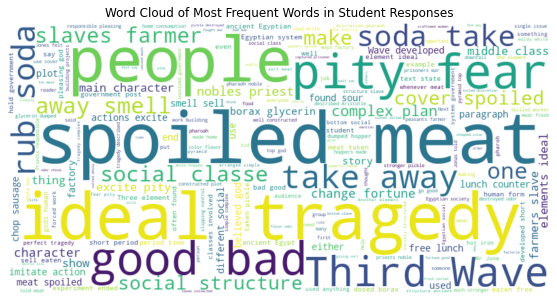

In [727]:
#this a word cloud to visualize the most occuring words in texts, here we can see which words are used more frequently by students
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words_df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words in Student Responses')
plt.axis('off')
plt.show()

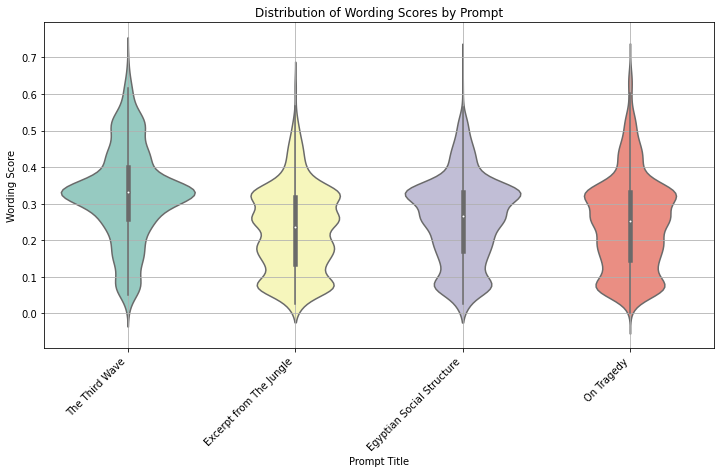

In [728]:
#this is a violin plot to visualize wording scores foe each prompt, here we can see how students have performed on different prompts in wording score
plt.figure(figsize=(12, 6))
sns.violinplot(x='prompt_title', y='wording', data=words_df, palette='Set3')
plt.title('Distribution of Wording Scores by Prompt')
plt.xlabel('Prompt Title')
plt.ylabel('Wording Score')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()

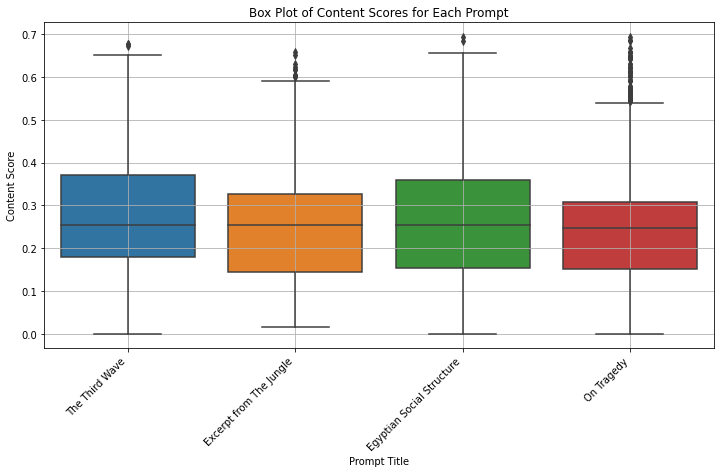

In [729]:
#this is a box plot to visualize content scores foe each prompt, here we can see how students have performed on different prompts in content score
plt.figure(figsize=(12, 6))
sns.boxplot(x='prompt_title', y='content', data=words_df)
plt.title('Box Plot of Content Scores for Each Prompt')
plt.xlabel('Prompt Title')
plt.ylabel('Content Score')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()

## **Section 6: Baseline Model (Q7, 10 points)**

In [730]:
words_df=essays_df.copy()

In [731]:
words_df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,...,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count,correlation
0,000e8c3c7ddb,814d6b,third wave experimentto see people reacted new...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,61,596,...,300,21,5,1,64.41,4.20,93,283,4,0.75138
1,0070c9e7af47,814d6b,Third Wave developed rapidly students genuinly...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,203,596,...,300,46,9,3,65.22,14.98,301,990,14,0.75138
2,0095993991fe,814d6b,third wave started experiment within class slo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,60,596,...,300,29,5,1,76.22,4.20,86,277,5,0.75138
3,00c20c6ddd23,814d6b,experimen orginally even terrible thngs happen...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,76,596,...,300,36,7,1,54.26,5.52,111,366,3,0.75138
4,00d40ad10dc9,814d6b,third wave developed quickly due students part...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,27,596,...,300,15,5,1,74.69,1.75,38,117,2,0.75138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"made complex storyline, plot makes audience fe...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,33,604,...,303,20,0,0,54.90,2.17,46,147,1,0.75138
7161,ff0f65eecf02,39c16e,Aristotle descirbes ideal tradgedy one complex...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,30,604,...,303,18,3,0,66.41,1.97,39,131,1,0.75138
7162,ff186473ea0a,39c16e,tragedy complex plan simple one.A good plot pl...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,29,604,...,303,17,0,0,95.47,1.79,34,119,3,0.75138
7163,ff5e9e6068da,39c16e,Aristotle believed ideal tradegy include purga...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,49,604,...,303,21,2,0,71.85,3.64,71,242,3,0.75138


In [732]:
#we import reguired libraries for linear regression model.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [733]:
#We store the features in x variable and content and wording scores in two y variables
features=['num_of_words_text','num_of_words_prompt','distinct_words_text','distinct_words_prompt','num_of_common_words_1','num_of_common_words_2','num_of_common_words_3']
X = words_df[features]
y_content = words_df['content']
y_wording = words_df['wording']

In [734]:
#we use functions like train_test_split to split data into 80-20 %parts for training and testing
#we use other functions like linear regreesion, to train , fir , predict the data and get MSE score
X_train, X_test, y_train_content, y_test_content, y_train_wording, y_test_wording = train_test_split(
    X, y_content, y_wording, test_size=0.2, random_state=42)

In [735]:
content_model = LinearRegression()
wording_model = LinearRegression()

In [736]:
content_model.fit(X_train, y_train_content)
wording_model.fit(X_train, y_train_wording)

LinearRegression()

In [737]:
y_pred_content = content_model.predict(X_test)
y_pred_wording = wording_model.predict(X_test)


In [738]:
mse_content = mean_squared_error(y_test_content, y_pred_content)
mse_wording = mean_squared_error(y_test_wording, y_pred_wording)

In [739]:
print(f"Mean Squared Error for Content Model: {mse_content}")
print(f"Mean Squared Error for Wording Model: {mse_wording}")

Mean Squared Error for Content Model: 0.3089124917060883
Mean Squared Error for Wording Model: 0.4820126581010424


As the Data is not Cleaned, They Mean Squared Error is High

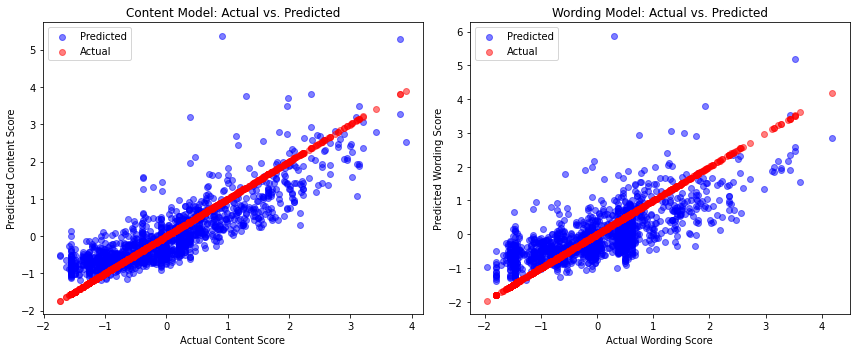

In [740]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_content, y_pred_content, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test_content, y_test_content, color='red', alpha=0.5, label='Actual')
plt.title("Content Model: Actual vs. Predicted")
plt.xlabel("Actual Content Score")
plt.ylabel("Predicted Content Score")
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_test_wording, y_pred_wording, color='blue', alpha=0.5, label='Predicted')
plt.scatter(y_test_wording, y_test_wording, color='red', alpha=0.5, label='Actual')
plt.title("Wording Model: Actual vs. Predicted")
plt.xlabel("Actual Wording Score")
plt.ylabel("Predicted Wording Score")
plt.legend()

plt.tight_layout()
plt.show()


## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

In [741]:
normalize_data=['content','wording','num_of_words_text','num_of_words_prompt','distinct_words_text','distinct_words_prompt','num_of_common_words_1','num_of_common_words_2','num_of_common_words_3','flesch_reading_ease','reading_time','syllable_count','letter_count','sentence_count']

In [742]:
numeric_data = words_df[normalize_data]

In [743]:
#we use min max scaler to normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_data)
normalized_df = pd.DataFrame(normalized_data, columns=normalize_data)
words_df[normalize_data] = normalized_df

In [744]:
words_df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,...,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count,correlation
0,000e8c3c7ddb,814d6b,third wave experimentto see people reacted new...,0.343779,0.373511,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.0624,0.110577,...,0.00000,0.072727,0.3125,0.25,0.744224,0.061862,0.074197,0.063940,0.065217,0.75138
1,0070c9e7af47,814d6b,Third Wave developed rapidly students genuinly...,0.888559,0.826099,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.2896,0.110577,...,0.00000,0.186364,0.5625,0.75,0.748974,0.291029,0.304540,0.293411,0.282609,0.75138
2,0095993991fe,814d6b,third wave started experiment within class slo...,0.343779,0.373511,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.0608,0.110577,...,0.00000,0.109091,0.3125,0.25,0.813475,0.061862,0.066445,0.061993,0.086957,0.75138
3,00c20c6ddd23,814d6b,experimen orginally even terrible thngs happen...,0.408128,0.467325,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.0864,0.110577,...,0.00000,0.140909,0.4375,0.25,0.684707,0.089923,0.094131,0.090880,0.043478,0.75138
4,00d40ad10dc9,814d6b,third wave developed quickly due students part...,0.145513,0.299817,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.0080,0.110577,...,0.00000,0.045455,0.3125,0.25,0.804503,0.009779,0.013289,0.010062,0.021739,0.75138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"made complex storyline, plot makes audience fe...",0.132961,0.065948,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.0176,0.129808,...,0.02459,0.068182,0.0000,0.00,0.688460,0.018707,0.022148,0.019799,0.000000,0.75138
7161,ff0f65eecf02,39c16e,Aristotle descirbes ideal tradgedy one complex...,0.216473,0.059538,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.0128,0.129808,...,0.02459,0.059091,0.1875,0.00,0.755952,0.014456,0.014396,0.014606,0.000000,0.75138
7162,ff186473ea0a,39c16e,tragedy complex plan simple one.A good plot pl...,0.158949,0.218205,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.0112,0.129808,...,0.02459,0.054545,0.0000,0.00,0.926352,0.010629,0.008859,0.010711,0.043478,0.75138
7163,ff5e9e6068da,39c16e,Aristotle believed ideal tradegy include purga...,0.279280,0.286420,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.0432,0.129808,...,0.02459,0.072727,0.1250,0.00,0.787850,0.049957,0.049834,0.050633,0.043478,0.75138


In [745]:


# We apply logarithmic scaling to the selected features to apply non_linear scaling
words_df['content']=np.log1p(words_df['content'])
words_df['wording']=np.log1p(words_df['wording'])
words_df['num_of_words_text'] = np.log1p(words_df['num_of_words_text'])
words_df['num_of_words_prompt'] = np.log1p(words_df['num_of_words_prompt'])
words_df['distinct_words_text'] = np.log1p(words_df['distinct_words_text'])
words_df['distinct_words_prompt'] = np.log1p(words_df['distinct_words_prompt'])
words_df['num_of_common_words_1'] = np.log1p(words_df['num_of_common_words_1'])
words_df['num_of_common_words_2'] = np.log1p(words_df['num_of_common_words_2'])
words_df['num_of_common_words_3'] = np.log1p(words_df['num_of_common_words_3'])
words_df['flesch_reading_ease']=np.log1p(words_df['flesch_reading_ease'])
words_df['reading_time']=np.log1p(words_df['reading_time'])
words_df['syllable_count']=np.log1p(words_df['syllable_count'])
words_df['letter_count']=np.log1p(words_df['letter_count'])
words_df['sentence_count']=np.log1p(words_df['sentence_count'])
words_df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,num_of_words_text,num_of_words_prompt,...,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count,correlation
0,000e8c3c7ddb,814d6b,third wave experimentto see people reacted new...,0.295486,0.317371,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.060530,0.104880,...,0.000000,0.070204,0.271934,0.223144,0.556310,0.060024,0.071574,0.061979,0.063179,0.75138
1,0070c9e7af47,814d6b,Third Wave developed rapidly students genuinly...,0.635814,0.602182,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.254332,0.104880,...,0.000000,0.170893,0.446287,0.559616,0.559029,0.255440,0.265851,0.257283,0.248896,0.75138
2,0095993991fe,814d6b,third wave started experiment within class slo...,0.295486,0.317371,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.059023,0.104880,...,0.000000,0.103541,0.271934,0.223144,0.595245,0.060024,0.064331,0.060147,0.083382,0.75138
3,00c20c6ddd23,814d6b,experimen orginally even terrible thngs happen...,0.342261,0.383441,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.082869,0.104880,...,0.000000,0.131825,0.362905,0.223144,0.521592,0.086107,0.089960,0.086984,0.042560,0.75138
4,00d40ad10dc9,814d6b,third wave developed quickly due students part...,0.135852,0.262224,Summarize how the Third Wave developed over su...,The Third Wave,Background The Third Wave experiment took pl...,0.007968,0.104880,...,0.000000,0.044452,0.271934,0.223144,0.590285,0.009731,0.013202,0.010011,0.021506,0.75138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"made complex storyline, plot makes audience fe...",0.124834,0.063865,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.017447,0.122047,...,0.024293,0.065958,0.000000,0.000000,0.523817,0.018535,0.021907,0.019605,0.000000,0.75138
7161,ff0f65eecf02,39c16e,Aristotle descirbes ideal tradgedy one complex...,0.195956,0.057833,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.012719,0.122047,...,0.024293,0.057411,0.171850,0.000000,0.563011,0.014352,0.014294,0.014500,0.000000,0.75138
7162,ff186473ea0a,39c16e,tragedy complex plan simple one.A good plot pl...,0.147514,0.197378,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.011138,0.122047,...,0.024293,0.053110,0.000000,0.000000,0.655628,0.010573,0.008820,0.010654,0.042560,0.75138
7163,ff5e9e6068da,39c16e,Aristotle believed ideal tradegy include purga...,0.246298,0.251863,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 As the sequel to what has already...,0.042293,0.122047,...,0.024293,0.070204,0.117783,0.000000,0.581014,0.048750,0.048632,0.049393,0.042560,0.75138


In [746]:
#we train the linear regression model with cleaned and normalized features 
features1=['num_of_words_text','num_of_words_prompt','distinct_words_text','distinct_words_prompt','num_of_common_words_1','num_of_common_words_2','num_of_common_words_3','flesch_reading_ease','reading_time','syllable_count','letter_count','sentence_count']
X_1 = words_df[features1]
y_content_1 = words_df['content']
y_wording_1 = words_df['wording']

In [747]:
words_df[features1]

,num_of_words_text,num_of_words_prompt,distinct_words_text,distinct_words_prompt,num_of_common_words_1,num_of_common_words_2,num_of_common_words_3,flesch_reading_ease,reading_time,syllable_count,letter_count,sentence_count
0,0.060530,0.104880,0.112545,0.000000,0.070204,0.271934,0.223144,0.556310,0.060024,0.071574,0.061979,0.063179
1,0.254332,0.104880,0.330633,0.000000,0.170893,0.446287,0.559616,0.559029,0.255440,0.265851,0.257283,0.248896
2,0.059023,0.104880,0.109740,0.000000,0.103541,0.271934,0.223144,0.595245,0.060024,0.064331,0.060147,0.083382
3,0.082869,0.104880,0.134706,0.000000,0.131825,0.362905,0.223144,0.521592,0.086107,0.089960,0.086984,0.042560
4,0.007968,0.104880,0.036927,0.000000,0.044452,0.271934,0.223144,0.590285,0.009731,0.013202,0.010011,0.021506
...,...,...,...,...,...,...,...,...,...,...,...,...
7160,0.017447,0.122047,0.051920,0.024293,0.065958,0.000000,0.000000,0.523817,0.018535,0.021907,0.019605,0.000000
7161,0.012719,0.122047,0.042951,0.024293,0.057411,0.171850,0.000000,0.563011,0.014352,0.014294,0.014500,0.000000
7162,0.011138,0.122047,0.027823,0.024293,0.053110,0.000000,0.000000,0.655628,0.010573,0.008820,0.010654,0.042560
7163,0.042293,0.122047,0.066691,0.024293,0.070204,0.117783,0.000000,0.581014,0.048750,0.048632,0.049393,0.042560


# Model 0

In [748]:
X_train_1, X_test_1, y_train_content_1, y_test_content_1, y_train_wording_1, y_test_wording_1 = train_test_split(
    X_1, y_content_1, y_wording_1, test_size=0.2, random_state=42)

In [749]:
content_model_1 = LinearRegression()
wording_model_1 = LinearRegression()

In [750]:
content_model_1.fit(X_train, y_train_content_1)
wording_model_1.fit(X_train, y_train_wording_1)

LinearRegression()

In [751]:
y_pred_content_1 = content_model_1.predict(X_test)
y_pred_wording_1 = wording_model_1.predict(X_test)


In [752]:
mse_content_1 = mean_squared_error(y_test_content_1, y_pred_content_1)
mse_wording_1 = mean_squared_error(y_test_wording_1, y_pred_wording_1)

In [753]:
print(f"Mean Squared Error for Content Model: {mse_content_1}")
print(f"Mean Squared Error for Wording Model: {mse_wording_1}")

Mean Squared Error for Content Model: 0.005931257649153493
Mean Squared Error for Wording Model: 0.007269669439413126


In [754]:
#After Cleaning the Data The MSE is Low

# Model 1 

Similar To Linear Regreesion Model , we train the Random tree Regressor model with cleaned and normalized data and it has Less MSE. Therefore Random forest Algorithm is more Suited for this Data.

In [755]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


content_features2 = ['num_of_words_text', 'num_of_words_prompt', 'distinct_words_text', 'distinct_words_prompt',
                    'num_of_common_words_1', 'num_of_common_words_2', 'num_of_common_words_3',
                    'flesch_reading_ease', 'reading_time', 'syllable_count', 'letter_count', 'sentence_count']
wording_features2 = content_features2

X_content2 = words_df[content_features2]
X_wording2 = words_df[wording_features2]
y_content2 = words_df['content']
y_wording2 = words_df['wording']


X_train_content2, X_test_content2, y_train_content2, y_test_content2 = train_test_split(
    X_content2, y_content2, test_size=0.2, random_state=42)
X_train_wording2, X_test_wording2, y_train_wording2, y_test_wording2 = train_test_split(
    X_wording2, y_wording2, test_size=0.2, random_state=42)

content_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
wording_model2 = RandomForestRegressor(n_estimators=100, random_state=42)


content_model2.fit(X_train_content2, y_train_content2)
wording_model2.fit(X_train_wording2, y_train_wording2)

y_pred_content2 = content_model2.predict(X_test_content2)
y_pred_wording2 = wording_model2.predict(X_test_wording2)


mse_content2 = mean_squared_error(y_test_content2, y_pred_content2)
mse_wording2 = mean_squared_error(y_test_wording2, y_pred_wording2)

print(f"Mean Squared Error (Content): {mse_content2}")
print(f"Mean Squared Error (Wording): {mse_wording2}")


Mean Squared Error (Content): 0.00364017306124877
Mean Squared Error (Wording): 0.005079272991981028


## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):